# **Fraud Detection**

In [ ]:
#importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

**The purpose of this Notebook is understanding the dataset (train dataset), doing EDA, visualization, trying different models, hyperparameter tuning.**

**We will pre-process the Test Data using a code of this Notebook in a different Notebook, Which will also be used for making predicitions on test dataset.**

**Once we have a model that performs best on validation dataset, We'll use that model to do prediction on Test Dataset in a different Notebook.**

In [ ]:
#importing train dataset

train_inp=pd.read_csv('/Train_Inpatientdata-1542865627584.csv')
train_out=pd.read_csv('/Train_Outpatientdata-1542865627584.csv')
train_ben=pd.read_csv('/Train_Beneficiarydata-1542865627584.csv')
train_lab=pd.read_csv('/Train-1542865627584.csv')

In [ ]:
print(train_inp.columns)
print(train_inp.shape)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')
(40474, 30)


In [ ]:
print(train_out.columns)
print(train_out.shape)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')
(517737, 27)


In [ ]:
print(train_ben.columns)
print(train_ben.shape)

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')
(138556, 25)


In [ ]:
print(train_lab.columns)
print(train_lab.shape)

Index(['Provider', 'PotentialFraud'], dtype='object')
(5410, 2)


# **Preprocessing the Dataset**

**We have 4 dataframes for train dataset which have a lot of common columns, So let's merge them in order to make meaningful interpretations.**

In [ ]:
# adding a feature named inpatient: 1=yes, 0=no

train_inp['Hospitalized'] = 1
train_out['Hospitalized'] = 0

In [ ]:
# merging the train dataframes

common_cols=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Hospitalized']

train_merged = pd.merge(train_out, train_inp, left_on=common_cols,
                        right_on=common_cols, how='outer')

train_merged=pd.merge(train_merged, train_ben, on="BeneID")

train=pd.merge(train_merged, train_lab, on="Provider")

print(train.shape)

(558211, 56)


In [ ]:
train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Hospitalized,AdmissionDt,DischargeDt,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,1938-03-01,NaN,1,1,0,49,430,12,12,2,2,2,2,2,2,2,1,2,2,2,0,0,120,30,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,1938-03-01,NaN,1,1,0,49,430,12,12,2,2,2,2,2,2,2,1,2,2,2,0,0,120,30,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,64880,0,NaN,NaN,NaN,1939-08-01,NaN,1,1,0,33,420,12,12,1,2,2,2,2,2,2,1,1,2,1,0,0,2530,540,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36401,0,NaN,NaN,NaN,1939-08-01,NaN,1,1,0,33,420,12,12,1,2,2,2,2,2,2,1,1,2,1,0,0,2530,540,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78009,0,NaN,NaN,NaN,1939-08-01,NaN,1,1,0,33,420,12,12,1,2,2,2,2,2,2,1,1,2,1,0,0,2530,540,No


**Adding meaningful feature out of claim start and claim end date**

In [ ]:
# adding claim period feature

startdate= pd.to_datetime( train["ClaimStartDt"] )
enddate= pd.to_datetime( train["ClaimEndDt"] )

period = (enddate - startdate).dt.days
train["Claim_Period"] = period

In [ ]:
# adding a meaningful feature out of admit date(hospitalization) and release date

startdate= pd.to_datetime( train["AdmissionDt"] )
enddate= pd.to_datetime( train["DischargeDt"] )

period = ( enddate - startdate).dt.days
train["Admit_Period"] = period

In [ ]:
# now we can drop the four dates as they are not needed

print(train.shape)
train=train.drop(columns=["ClaimStartDt" , "ClaimEndDt", "AdmissionDt", "DischargeDt"], axis=1)
print(train.shape)

(558211, 58)
(558211, 54)


In [ ]:
train.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Hospitalized,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Claim_Period,Admit_Period
0,BENE100000,CLM126832,PRV57172,50,PHY383401,NaN,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,1938-03-01,NaN,1,1,0,49,430,12,12,2,2,2,2,2,2,2,1,2,2,2,0,0,120,30,Yes,0,NaN
1,BENE100000,CLM351838,PRV57172,70,PHY370909,NaN,PHY363377,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,1938-03-01,NaN,1,1,0,49,430,12,12,2,2,2,2,2,2,2,1,2,2,2,0,0,120,30,Yes,0,NaN
2,BENE100001,CLM229075,PRV55158,70,PHY383478,NaN,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,64880,0,NaN,1939-08-01,NaN,1,1,0,33,420,12,12,1,2,2,2,2,2,2,1,1,2,1,0,0,2530,540,No,0,NaN
3,BENE100001,CLM258631,PRV54966,70,PHY347511,NaN,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36401,0,NaN,1939-08-01,NaN,1,1,0,33,420,12,12,1,2,2,2,2,2,2,1,1,2,1,0,0,2530,540,Yes,0,NaN
4,BENE100001,CLM332544,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78009,0,NaN,1939-08-01,NaN,1,1,0,33,420,12,12,1,2,2,2,2,2,2,1,1,2,1,0,0,2530,540,No,2,NaN


In [ ]:
# Extract columns with names starting with "ChronicCond"

chronic_cols_names = train.columns[train.columns.str.startswith("ChronicCond")]

# Replace values of 2 with 0 in the extracted columns

train[chronic_cols_names] = train[chronic_cols_names].replace({2: 0})

In [ ]:
# Replace values of "Yes" with 1 and "No" with 0 in the "PotentialFraud" column

train["PotentialFraud"] = train["PotentialFraud"].replace({"Yes": 1, "No": 0})

/tmp/ipykernel_34/3320978004.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train["PotentialFraud"] = train["PotentialFraud"].replace({"Yes": 1, "No": 0})


In [ ]:
# Replace values of 2 with 0 in the "Gender" column

train["Gender"] = train["Gender"].replace({2: 0})

In [ ]:
# Replace values of "Y" with 1 in the "RenalDiseaseIndicator" column

train["RenalDiseaseIndicator"] = train["RenalDiseaseIndicator"].replace({"Y": 1})

In [ ]:
# Convert "DOB" and "DOD" columns to datetime

birthdate = pd.to_datetime(train["DOB"])
enddate = pd.to_datetime(train["DOD"])

# Check whether the patient is dead or alive
def alive_function(value):
    if value == True:
        return 1
    else:
        return 0

alive = pd.isna(enddate).apply(alive_function)

# Get the age of the patient

max_date = enddate.dropna().max()
enddate[pd.isna(enddate)] = max_date
period = (((enddate - birthdate).dt.days / 365).astype(int))

# Assign age and alive status to the train DataFrame

train["Age"] = period
train["Alive"] = alive

In [ ]:
# dropping DOD, DOB from train

train=train.drop(columns=["DOB", "DOD"], axis=1)

In [ ]:
train.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Hospitalized,DiagnosisGroupCode,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Claim_Period,Admit_Period,Age,Alive
0,BENE100000,CLM126832,PRV57172,50,PHY383401,NaN,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,1,0,NaN,71,1
1,BENE100000,CLM351838,PRV57172,70,PHY370909,NaN,PHY363377,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,1,0,NaN,71,1
2,BENE100001,CLM229075,PRV55158,70,PHY383478,NaN,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,64880,0,NaN,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,0,0,NaN,70,1
3,BENE100001,CLM258631,PRV54966,70,PHY347511,NaN,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36401,0,NaN,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,1,0,NaN,70,1
4,BENE100001,CLM332544,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78009,0,NaN,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,0,2,NaN,70,1


In [ ]:
train.shape

(558211, 54)

In [ ]:
# Checking if there is some overlap among different physicians

def check_physicians(train_df):
    same_physicians = []
    two_same_physicians = []
    none_same_physicians = []
    counter=0

    for index, row in train_df.iterrows():
        AttendingPhysician = row['AttendingPhysician']
        OtherPhysician = row['OtherPhysician']
        OperatingPhysician = row['OperatingPhysician']

        # All three physicians are the same
        if AttendingPhysician == OtherPhysician == OperatingPhysician:
            same_physicians.append(index)

        # Any two physicians are the same
        elif AttendingPhysician == OtherPhysician or AttendingPhysician == OperatingPhysician or OtherPhysician == OperatingPhysician:
            two_same_physicians.append(index)

        # None of the physicians are the same
        else:
            none_same_physicians.append(index)


    return same_physicians, two_same_physicians, none_same_physicians

# Calling the function with train set dataframe
same_physicians, two_same_physicians, none_same_physicians = check_physicians(train)

print("Instances where all three physicians are the same:", len(same_physicians))
print("Instances where any two of the physicians are the same:", len(two_same_physicians))
print("Instances where none of the physicians are the same:", len(none_same_physicians))

Instances where all three physicians are the same: 13176
Instances where any two of the physicians are the same: 122778
Instances where none of the physicians are the same: 422257


In [ ]:
# Extracting a similarity feature out of Physician type

def check_physician_similarity(data_row):
    attending_operating = data_row["AttendingPhysician"] == data_row["OperatingPhysician"]
    operating_other = data_row["OperatingPhysician"] == data_row["OtherPhysician"]
    attending_other = data_row["AttendingPhysician"] == data_row["OtherPhysician"]

    if attending_operating and operating_other:  # attending = operating = other
        return 0
    elif attending_operating and not operating_other:  # attending = operating != other
        return 1
    elif not attending_operating and operating_other:  # attending != operating = other
        return 2
    else:  # attending != operating != other
        return 3

# Apply the function to each row of the DataFrame
train['Same_Physician'] = train.apply(check_physician_similarity, axis=1)

# Define a function to count the number of non-null physician IDs
def physician_count(row, list_count):
    count = 0
    for col in list_count:
        if not pd.isnull(row[col]):
            count += 1
    return count

list_count = ["AttendingPhysician", "OperatingPhysician", "OtherPhysician"]

train['Physician_Count'] = train.apply(physician_count, axis=1, args=(list_count,))

In [ ]:
train.shape

(558211, 56)

In [ ]:
train.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Hospitalized,DiagnosisGroupCode,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Claim_Period,Admit_Period,Age,Alive,Same_Physician,Physician_Count
0,BENE100000,CLM126832,PRV57172,50,PHY383401,NaN,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,1,0,NaN,71,1,3,1
1,BENE100000,CLM351838,PRV57172,70,PHY370909,NaN,PHY363377,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,1,0,NaN,71,1,3,2
2,BENE100001,CLM229075,PRV55158,70,PHY383478,NaN,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,64880,0,NaN,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,0,0,NaN,70,1,3,1
3,BENE100001,CLM258631,PRV54966,70,PHY347511,NaN,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36401,0,NaN,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,1,0,NaN,70,1,3,1
4,BENE100001,CLM332544,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78009,0,NaN,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,0,2,NaN,70,1,2,3


**As we can see, The number of Providers are way less than the number of rows here so there is a massive repetion of Providers and it'd not be a good idea to feed all this data to the model.**

**Let's say for all repetetions of Provider the values in other features are completely divergent, So we need to accumulate the values of other features using some statistic like mean in order to make meaningful predictions. We will do that after doing some EDA.**

# **Exploratory Data Analysis**

In [ ]:
# Check the null values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   Provider                         558211 non-null  object 
 3   InscClaimAmtReimbursed           558211 non-null  int64  
 4   AttendingPhysician               556703 non-null  object 
 5   OperatingPhysician               114447 non-null  object 
 6   OtherPhysician                   199736 non-null  object 
 7   ClmDiagnosisCode_1               547758 non-null  object 
 8   ClmDiagnosisCode_2               362605 non-null  object 
 9   ClmDiagnosisCode_3               243055 non-null  object 
 10  ClmDiagnosisCode_4               164536 non-null  object 
 11  ClmDiagnosisCode_5               111924 non-null  object 
 12  Cl

In [ ]:
import seaborn as sns

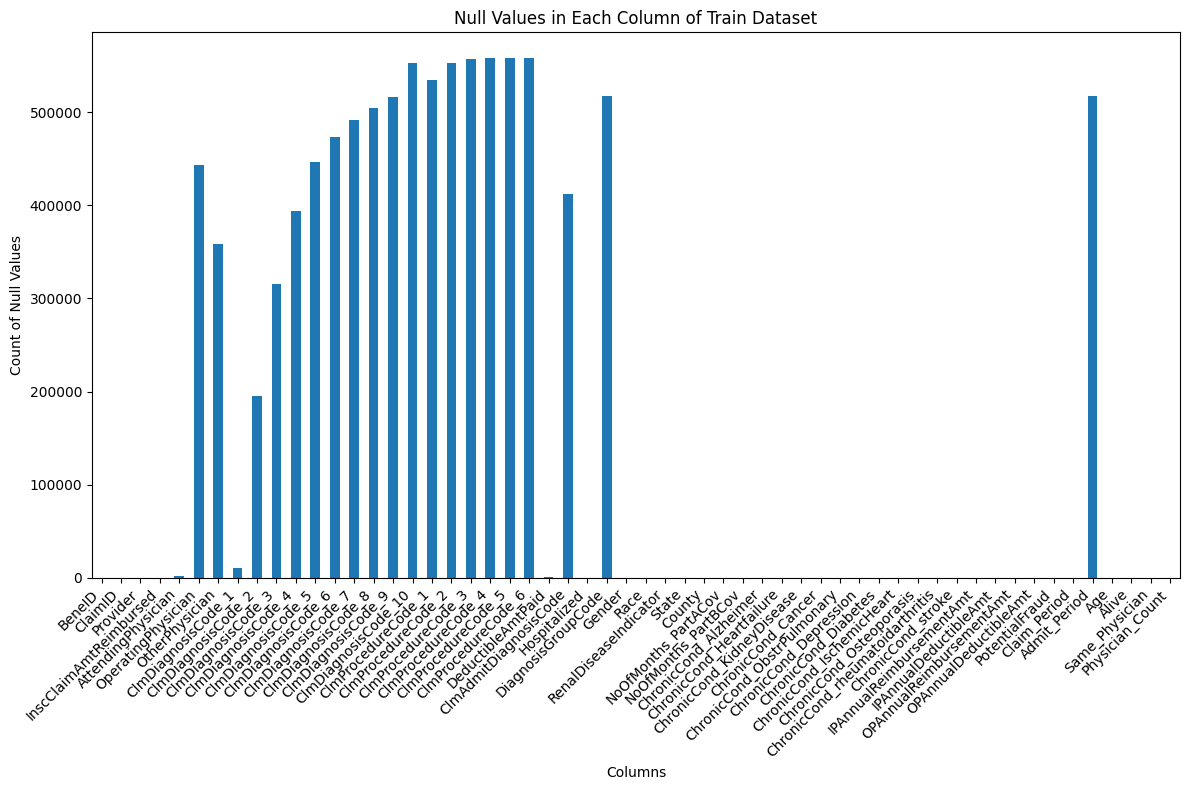

In [ ]:
# Plotting null values for each column

plt.figure(figsize=(12, 8))
null_counts = train.isnull().sum()
null_counts.plot(kind='bar')
plt.title('Null Values in Each Column of Train Dataset')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

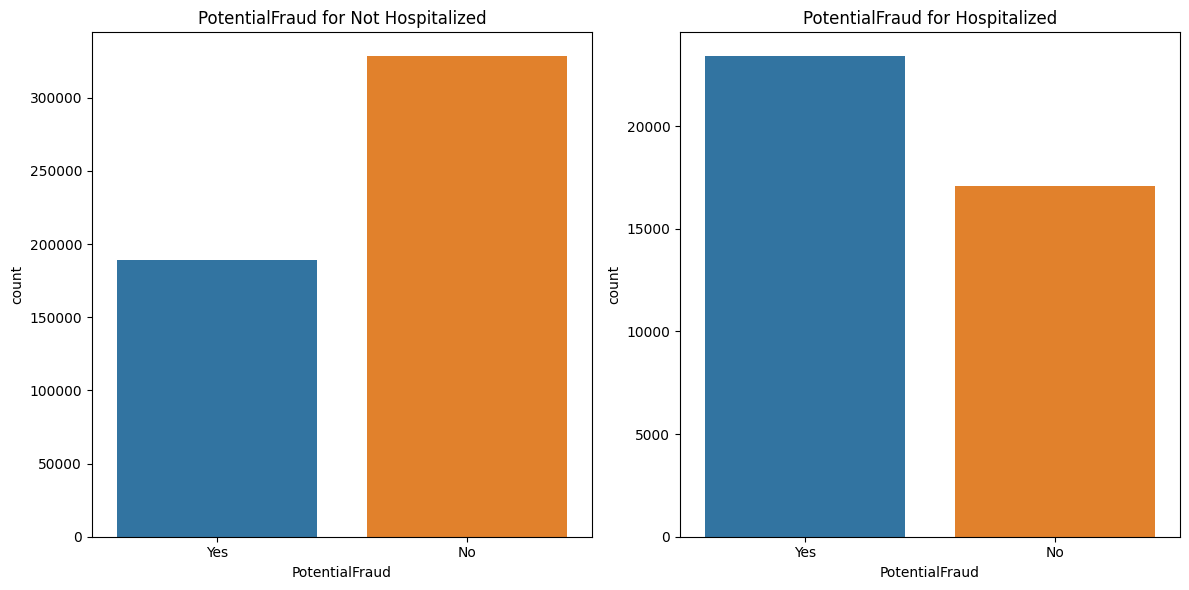

In [ ]:
# Plotting Potential Fraud distribution

fraud_mapping = {0: 'No', 1: 'Yes'}

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=train[train['Hospitalized'] == 0]['PotentialFraud'].map(fraud_mapping))
plt.title('PotentialFraud for Not Hospitalized')

plt.subplot(1, 2, 2)
sns.countplot(x=train[train['Hospitalized'] == 1]['PotentialFraud'].map(fraud_mapping))
plt.title('PotentialFraud for Hospitalized')

plt.tight_layout()
plt.show()

In [ ]:
train["PotentialFraud"].value_counts()

PotentialFraud
0    345415
1    212796
Name: count, dtype: int64

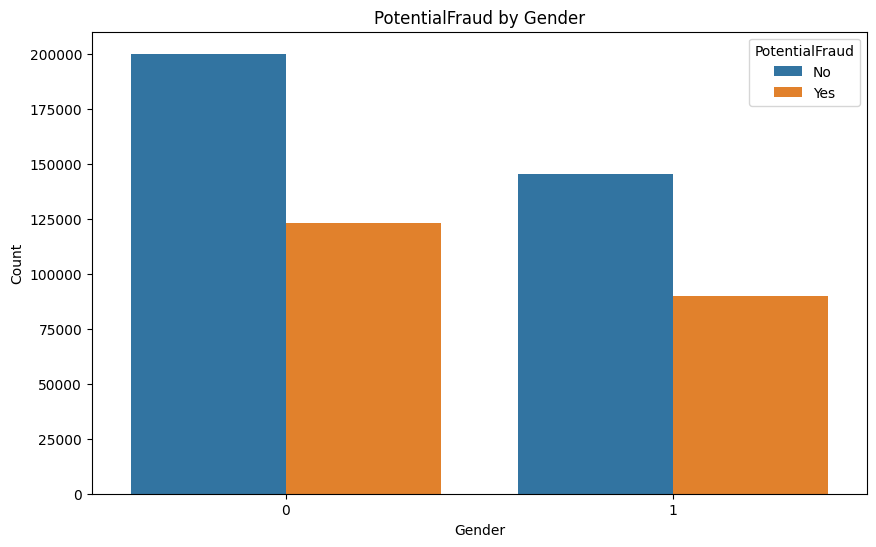

In [ ]:
# Plot for PotentialFraud with Gender

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='PotentialFraud', data=train)
plt.title('PotentialFraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='PotentialFraud', labels=['No', 'Yes'])
plt.show()

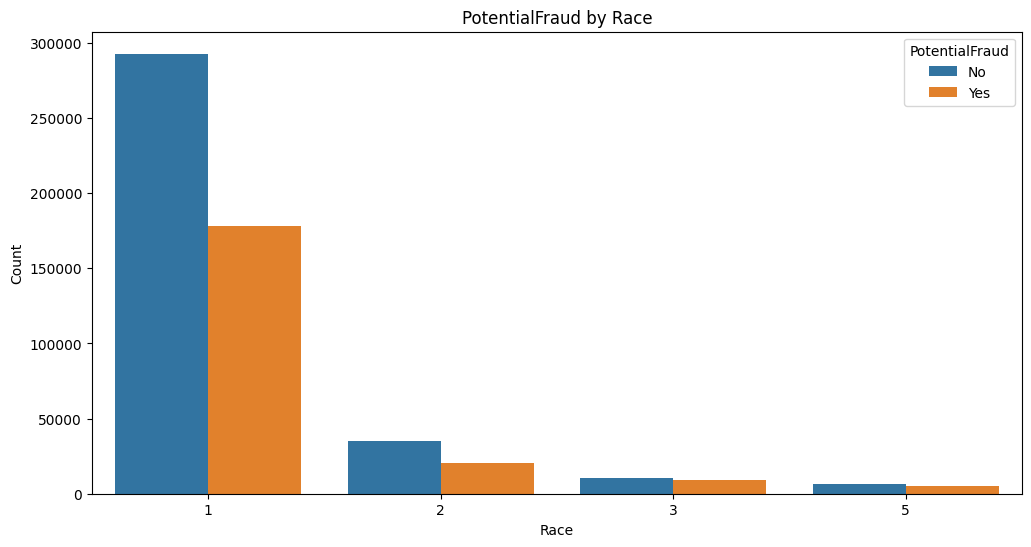

In [ ]:
# Plot for PotentialFraud with Race

plt.figure(figsize=(12, 6))
sns.countplot(x='Race', hue='PotentialFraud', data=train)
plt.title('PotentialFraud by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='PotentialFraud', labels=['No', 'Yes'])
plt.show()


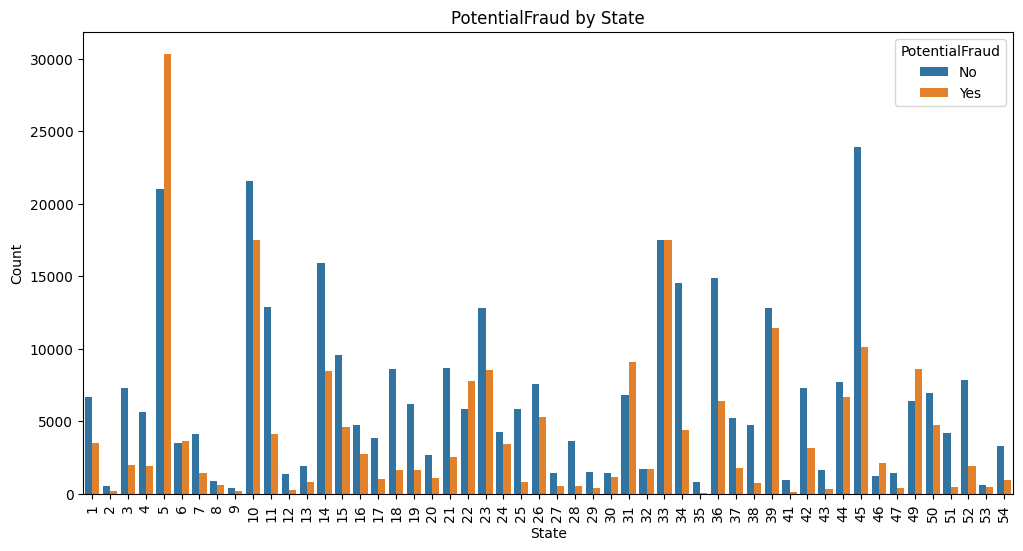

In [ ]:
# Plot for PotentialFraud with State

plt.figure(figsize=(12, 6))
sns.countplot(x='State', hue='PotentialFraud', data=train)
plt.title('PotentialFraud by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='PotentialFraud', labels=['No', 'Yes'])
plt.xticks(rotation=90)
plt.show()


In [ ]:
train.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Hospitalized,DiagnosisGroupCode,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Claim_Period,Admit_Period,Age,Alive,Same_Physician,Physician_Count
0,BENE100000,CLM126832,PRV57172,50,PHY383401,NaN,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,1,0,NaN,71,1,3,1
1,BENE100000,CLM351838,PRV57172,70,PHY370909,NaN,PHY363377,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,1,1,0,49,430,12,12,0,0,0,0,0,0,0,1,0,0,0,0,0,120,30,1,0,NaN,71,1,3,2
2,BENE100001,CLM229075,PRV55158,70,PHY383478,NaN,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,64880,0,NaN,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,0,0,NaN,70,1,3,1
3,BENE100001,CLM258631,PRV54966,70,PHY347511,NaN,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36401,0,NaN,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,1,0,NaN,70,1,3,1
4,BENE100001,CLM332544,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78009,0,NaN,1,1,0,33,420,12,12,1,0,0,0,0,0,0,1,1,0,1,0,0,2530,540,0,2,NaN,70,1,2,3


In [ ]:
# Checking the unique values of different kinds of Physicians

print(len(train['OperatingPhysician'].value_counts()))
print(len(train['AttendingPhysician'].value_counts()))
print(len(train['OtherPhysician'].value_counts()))

35315
82063
46457


In [ ]:
# Checking the number of unique BeneIDs

len(train["BeneID"].value_counts())

138556

In [ ]:
# Checking the number of unique Providers

len(train["Provider"].value_counts())

5410

In [ ]:
# Checking the number of unique ClmDiagnosisCode IDs

print(len(train["ClmDiagnosisCode_1"].value_counts()))
print(len(train["ClmDiagnosisCode_2"].value_counts()))
print(len(train["ClmDiagnosisCode_3"].value_counts()))
print(len(train["ClmDiagnosisCode_4"].value_counts()))
print(len(train["ClmDiagnosisCode_5"].value_counts()))
print(len(train["ClmDiagnosisCode_6"].value_counts()))
print(len(train["ClmDiagnosisCode_7"].value_counts()))
print(len(train["ClmDiagnosisCode_8"].value_counts()))
print(len(train["ClmDiagnosisCode_9"].value_counts()))
print(len(train["ClmDiagnosisCode_10"].value_counts()))

10450
5300
4756
4359
3970
3607
3388
3070
2774
1158


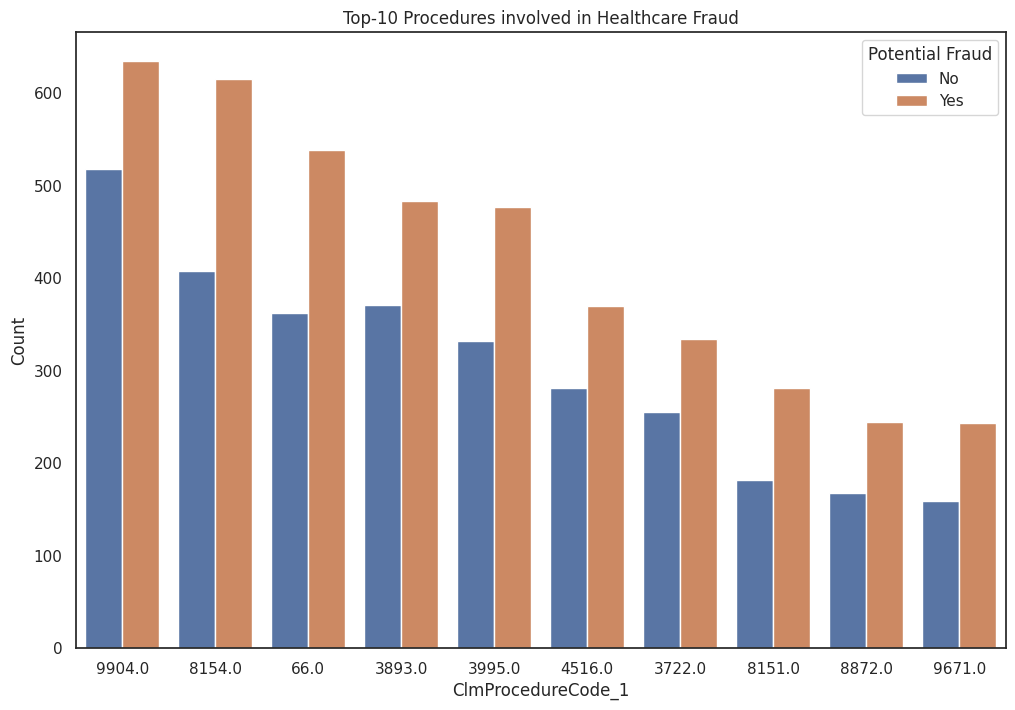

In [ ]:
# Countplot for Procedures that are most related to Fraud

sns.set(rc={'figure.figsize':(12,8)}, style='white')

ax = sns.countplot(x='ClmProcedureCode_1', hue='PotentialFraud', data=train,
                   order=train['ClmProcedureCode_1'].value_counts().iloc[:10].index)

plt.title('Top-10 Procedures involved in Healthcare Fraud')
plt.xlabel('ClmProcedureCode_1')
plt.ylabel('Count')
plt.legend(title='Potential Fraud', labels=['No', 'Yes'])

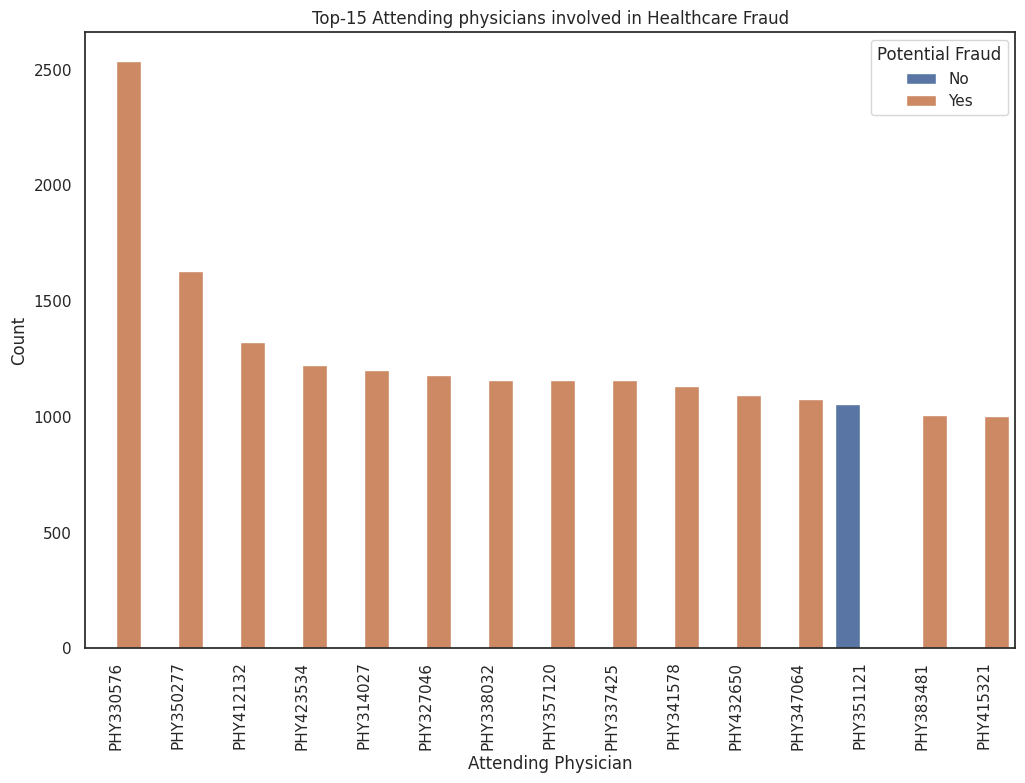

In [ ]:
# Counting the occurence of Physicians who are inolved in a healthcare fraud

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax = sns.countplot(x='AttendingPhysician', hue='PotentialFraud', data=train,
                   order=train['AttendingPhysician'].value_counts().iloc[:15].index)

plt.title('Top-15 Attending physicians involved in Healthcare Fraud')
plt.xlabel('Attending Physician')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Potential Fraud', labels=['No', 'Yes'])

**For performing feature engineering on this dataset, There are several challenges that needs to be addressed, Starting with the accumulation of features in order to have one set of features for each Provider ID and not multiple. And even in that case, We need to make sure that the features that are selected are related to the ground truth(Fraud/Not Fraud).**

In [ ]:
train.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Hospitalized', 'DiagnosisGroupCode', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Ost

**Looking carefully at the columns here of Train Dataset, We can broadly classify them into these kinds of columns:**

1) Unique IDs like Provider, BeneID, ClaimID

2) Unique IDs of Physicians (attending, operating, other)

3) ClmDiagnosis_1-10  (Unique IDs again)

4) ClmProcedure_1-6   (Unique IDs again)

5) Categorical values like Gender, Race, State, County

6) Chronic Conditions of all kinds ( categorical again )

7) Features involving money ( Continuos variables )

Note : There are other features as well that might not have got covered here, But the aim here is to meaningfully accumulate features so that we have a unique set of features for each Provider.

In terms of accumulation of features, For continuos variables we can take mean and standard deviation to capture a representation of those features. But for indicator variables like chronic disease, accumulating them won't help the model learn the representation behind it.

In [ ]:
print(len(train['ClmDiagnosisCode_1'].value_counts()))
print(len(train['ClmProcedureCode_1'].value_counts()))
print(len(train['BeneID'].value_counts()))
print(len(train['ClaimID'].value_counts()))
print(len(train['Provider'].value_counts()))

10450
1117
138556
558211
5410


The columns involving continuos variables are :

In [ ]:
cont_var=["InscClaimAmtReimbursed","DeductibleAmtPaid","NoOfMonths_PartACov","NoOfMonths_PartBCov",
           "IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt"]

If we Produce different set of features from this, ie use BeneID, Provider, ClmProcedureCode_1, ClmDiagnosisCode_1 to group the data and then perform accumulation using mean and standard deviation, It could then be used to do inference.

In [ ]:
def groupby(df,by,vars_to_group,methods,col_ident,as_index=True,agg=False):
    if agg:
        grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].agg(methods)
        cols=['_'.join(col) for col in grouped.columns.values]
        cols=[col_ident+"_"+col for col in cols]
        grouped.columns=cols
        return grouped

    else:
        concat=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(methods[0])
        cols=[ col_ident+"_"+col+"_"+methods[0] for col in concat.columns ]
        concat.columns=cols

        for method in methods[1:]:
            grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(method)
            cols=[col_ident+"_"+col+"_"+method for col in grouped.columns]
            grouped.columns=cols
            concat=pd.concat([concat,grouped],axis=1)

        return concat

In [ ]:
traincopy=train

In [ ]:
feat_provider=groupby(traincopy,["Provider"],cont_var,["mean","std"],"Provider",
                       True,False)

In [ ]:
feat_provider.head()

,Provider_InscClaimAmtReimbursed_mean,Provider_DeductibleAmtPaid_mean,Provider_NoOfMonths_PartACov_mean,Provider_NoOfMonths_PartBCov_mean,Provider_IPAnnualReimbursementAmt_mean,Provider_IPAnnualDeductibleAmt_mean,Provider_OPAnnualReimbursementAmt_mean,Provider_OPAnnualDeductibleAmt_mean,Provider_InscClaimAmtReimbursed_std,Provider_DeductibleAmtPaid_std,Provider_NoOfMonths_PartACov_std,Provider_NoOfMonths_PartBCov_std,Provider_IPAnnualReimbursementAmt_std,Provider_IPAnnualDeductibleAmt_std,Provider_OPAnnualReimbursementAmt_std,Provider_OPAnnualDeductibleAmt_std
0,787.556818,54.835702,11.956818,11.955114,4007.159091,401.688636,2217.659091,658.102273,2990.709558,231.546534,0.705988,0.631490,11133.327271,808.872917,3367.759401,944.825307
1,787.556818,54.835702,11.956818,11.955114,4007.159091,401.688636,2217.659091,658.102273,2990.709558,231.546534,0.705988,0.631490,11133.327271,808.872917,3367.759401,944.825307
2,728.094556,44.410330,11.931232,11.948424,5631.962751,747.455587,2378.896848,720.280802,3240.710190,209.823046,0.906456,0.785580,14922.422875,2797.033485,3891.683855,1092.028343
3,279.515590,3.329621,11.900891,11.971604,4812.689310,568.255011,2465.406459,723.635857,561.147193,17.252651,1.081204,0.528598,11608.625626,1629.887167,4189.824589,1152.712571
4,965.194805,60.675325,11.844156,12.000000,5997.792208,607.636364,1995.584416,665.948052,5078.721765,238.162397,1.367527,0.000000,12473.747445,812.156630,3812.943501,1010.529042


In [ ]:
# Similarly producing 3 more sets of new features by accumulating existing features

feat_bene=groupby(traincopy,["BeneID"],cont_var,["mean","std"],"Bene",
                       True,False)

feat_diagcode=groupby(traincopy,["ClmDiagnosisCode_1"],cont_var,["mean","std"],"DiagCode",
                       True,False)

feat_proccode=groupby(traincopy,["ClmProcedureCode_1"],cont_var,["mean","std"],"ProcCode",
                       True,False)


In [ ]:
train.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Hospitalized', 'DiagnosisGroupCode', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Ost

In [ ]:
# Now that we have these 4 set of features we can start modelling by using these features
# With the pre-existing features

In [ ]:
prev_feat=["Same_Physician","Physician_Count","Claim_Period","Admit_Period","Age","Alive","Provider","PotentialFraud"]
prevfeat=traincopy[prev_feat]

In [ ]:
prevfeat

,Same_Physician,Physician_Count,Claim_Period,Admit_Period,Age,Alive,Provider,PotentialFraud
0,3,1,0,NaN,71,1,PRV57172,1
1,3,2,0,NaN,71,1,PRV57172,1
2,3,1,0,NaN,70,1,PRV55158,0
3,3,1,0,NaN,70,1,PRV54966,1
4,2,3,2,NaN,70,1,PRV54890,0
...,...,...,...,...,...,...,...,...
558206,3,1,0,NaN,73,1,PRV55826,0
558207,3,1,0,NaN,73,1,PRV54670,0
558208,3,2,0,NaN,73,1,PRV57336,0
558209,3,1,0,NaN,73,1,PRV51690,0


In [ ]:
agg_data=pd.concat([prevfeat,feat_provider,feat_bene,feat_diagcode,feat_proccode],axis=1)

In [ ]:
agg_data

,Same_Physician,Physician_Count,Claim_Period,Admit_Period,Age,Alive,Provider,PotentialFraud,Provider_InscClaimAmtReimbursed_mean,Provider_DeductibleAmtPaid_mean,Provider_NoOfMonths_PartACov_mean,Provider_NoOfMonths_PartBCov_mean,Provider_IPAnnualReimbursementAmt_mean,Provider_IPAnnualDeductibleAmt_mean,Provider_OPAnnualReimbursementAmt_mean,Provider_OPAnnualDeductibleAmt_mean,Provider_InscClaimAmtReimbursed_std,Provider_DeductibleAmtPaid_std,Provider_NoOfMonths_PartACov_std,Provider_NoOfMonths_PartBCov_std,Provider_IPAnnualReimbursementAmt_std,Provider_IPAnnualDeductibleAmt_std,Provider_OPAnnualReimbursementAmt_std,Provider_OPAnnualDeductibleAmt_std,Bene_InscClaimAmtReimbursed_mean,Bene_DeductibleAmtPaid_mean,Bene_NoOfMonths_PartACov_mean,Bene_NoOfMonths_PartBCov_mean,Bene_IPAnnualReimbursementAmt_mean,Bene_IPAnnualDeductibleAmt_mean,Bene_OPAnnualReimbursementAmt_mean,Bene_OPAnnualDeductibleAmt_mean,Bene_InscClaimAmtReimbursed_std,Bene_DeductibleAmtPaid_std,Bene_NoOfMonths_PartACov_std,Bene_NoOfMonths_PartBCov_std,Bene_IPAnnualReimbursementAmt_std,Bene_IPAnnualDeductibleAmt_std,Bene_OPAnnualReimbursementAmt_std,Bene_OPAnnualDeductibleAmt_std,DiagCode_InscClaimAmtReimbursed_mean,DiagCode_DeductibleAmtPaid_mean,DiagCode_NoOfMonths_PartACov_mean,DiagCode_NoOfMonths_PartBCov_mean,DiagCode_IPAnnualReimbursementAmt_mean,DiagCode_IPAnnualDeductibleAmt_mean,DiagCode_OPAnnualReimbursementAmt_mean,DiagCode_OPAnnualDeductibleAmt_mean,DiagCode_InscClaimAmtReimbursed_std,DiagCode_DeductibleAmtPaid_std,DiagCode_NoOfMonths_PartACov_std,DiagCode_NoOfMonths_PartBCov_std,DiagCode_IPAnnualReimbursementAmt_std,DiagCode_IPAnnualDeductibleAmt_std,DiagCode_OPAnnualReimbursementAmt_std,DiagCode_OPAnnualDeductibleAmt_std,ProcCode_InscClaimAmtReimbursed_mean,ProcCode_DeductibleAmtPaid_mean,ProcCode_NoOfMonths_PartACov_mean,ProcCode_NoOfMonths_PartBCov_mean,ProcCode_IPAnnualReimbursementAmt_mean,ProcCode_IPAnnualDeductibleAmt_mean,ProcCode_OPAnnualReimbursementAmt_mean,ProcCode_OPAnnualDeductibleAmt_mean,ProcCode_InscClaimAmtReimbursed_std,ProcCode_DeductibleAmtPaid_std,ProcCode_NoOfMonths_PartACov_std,ProcCode_NoOfMonths_PartBCov_std,ProcCode_IPAnnualReimbursementAmt_std,ProcCode_IPAnnualDeductibleAmt_std,ProcCode_OPAnnualReimbursementAmt_std,ProcCode_OPAnnualDeductibleAmt_std
0,3,1,0,NaN,71,1,PRV57172,1,787.556818,54.835702,11.956818,11.955114,4007.159091,401.688636,2217.659091,658.102273,2990.709558,231.546534,0.705988,0.631490,11133.327271,808.872917,3367.759401,944.825307,60.000000,0.0,12.0,12.0,0.0,0.0,120.0,30.0,14.142136,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,87.247706,0.137615,11.889908,11.922018,2006.467890,235.155963,1079.678899,336.330275,104.072569,1.511662,1.146740,0.790713,7151.597604,558.918659,1527.701019,472.929220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2,0,NaN,71,1,PRV57172,1,787.556818,54.835702,11.956818,11.955114,4007.159091,401.688636,2217.659091,658.102273,2990.709558,231.546534,0.705988,0.631490,11133.327271,808.872917,3367.759401,944.825307,60.000000,0.0,12.0,12.0,0.0,0.0,120.0,30.0,14.142136,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,151.296296,4.814815,12.000000,12.000000,3173.148148,438.814815,1787.962963,620.000000,187.486314,16.567841,0.000000,0.000000,5915.806082,743.239469,2877.674231,952.210933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,0,NaN,70,1,PRV55158,0,728.094556,44.410330,11.931232,11.948424,5631.962751,747.455587,2378.896848,720.280802,3240.710190,209.823046,0.906456,0.785580,14922.422875,2797.033485,3891.683855,1092.028343,143.000000,10.0,12.0,12.0,0.0,0.0,2530.0,540.0,212.814473,31.622777,0.0,0.0,0.0,0.0,0.0,0.0,125.000000,0.000000,12.000000,12.000000,0.000000,0.000000,1865.000000,467.500000,116.761866,0.000000,0.000000,0.000000,0.000000,0.000000,538.980519,151.299923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,0,NaN,70,1,PRV54966,1,279.515590,3.329621,11.900891,11.971604,4812.689310,568.255011,2465.406459,723.635857,561.147193,17.252651,1.08120

**Now we can do the aggregation of this and use mean values so that we have unique set of features for every provider**

In [ ]:
grouped=agg_data.groupby(by=["Provider","PotentialFraud"]).agg("mean").reset_index()

In [ ]:
grouped

,Provider,PotentialFraud,Same_Physician,Physician_Count,Claim_Period,Admit_Period,Age,Alive,Provider_InscClaimAmtReimbursed_mean,Provider_DeductibleAmtPaid_mean,Provider_NoOfMonths_PartACov_mean,Provider_NoOfMonths_PartBCov_mean,Provider_IPAnnualReimbursementAmt_mean,Provider_IPAnnualDeductibleAmt_mean,Provider_OPAnnualReimbursementAmt_mean,Provider_OPAnnualDeductibleAmt_mean,Provider_InscClaimAmtReimbursed_std,Provider_DeductibleAmtPaid_std,Provider_NoOfMonths_PartACov_std,Provider_NoOfMonths_PartBCov_std,Provider_IPAnnualReimbursementAmt_std,Provider_IPAnnualDeductibleAmt_std,Provider_OPAnnualReimbursementAmt_std,Provider_OPAnnualDeductibleAmt_std,Bene_InscClaimAmtReimbursed_mean,Bene_DeductibleAmtPaid_mean,Bene_NoOfMonths_PartACov_mean,Bene_NoOfMonths_PartBCov_mean,Bene_IPAnnualReimbursementAmt_mean,Bene_IPAnnualDeductibleAmt_mean,Bene_OPAnnualReimbursementAmt_mean,Bene_OPAnnualDeductibleAmt_mean,Bene_InscClaimAmtReimbursed_std,Bene_DeductibleAmtPaid_std,Bene_NoOfMonths_PartACov_std,Bene_NoOfMonths_PartBCov_std,Bene_IPAnnualReimbursementAmt_std,Bene_IPAnnualDeductibleAmt_std,Bene_OPAnnualReimbursementAmt_std,Bene_OPAnnualDeductibleAmt_std,DiagCode_InscClaimAmtReimbursed_mean,DiagCode_DeductibleAmtPaid_mean,DiagCode_NoOfMonths_PartACov_mean,DiagCode_NoOfMonths_PartBCov_mean,DiagCode_IPAnnualReimbursementAmt_mean,DiagCode_IPAnnualDeductibleAmt_mean,DiagCode_OPAnnualReimbursementAmt_mean,DiagCode_OPAnnualDeductibleAmt_mean,DiagCode_InscClaimAmtReimbursed_std,DiagCode_DeductibleAmtPaid_std,DiagCode_NoOfMonths_PartACov_std,DiagCode_NoOfMonths_PartBCov_std,DiagCode_IPAnnualReimbursementAmt_std,DiagCode_IPAnnualDeductibleAmt_std,DiagCode_OPAnnualReimbursementAmt_std,DiagCode_OPAnnualDeductibleAmt_std,ProcCode_InscClaimAmtReimbursed_mean,ProcCode_DeductibleAmtPaid_mean,ProcCode_NoOfMonths_PartACov_mean,ProcCode_NoOfMonths_PartBCov_mean,ProcCode_IPAnnualReimbursementAmt_mean,ProcCode_IPAnnualDeductibleAmt_mean,ProcCode_OPAnnualReimbursementAmt_mean,ProcCode_OPAnnualDeductibleAmt_mean,ProcCode_InscClaimAmtReimbursed_std,ProcCode_DeductibleAmtPaid_std,ProcCode_NoOfMonths_PartACov_std,ProcCode_NoOfMonths_PartBCov_std,ProcCode_IPAnnualReimbursementAmt_std,ProcCode_IPAnnualDeductibleAmt_std,ProcCode_OPAnnualReimbursementAmt_std,ProcCode_OPAnnualDeductibleAmt_std
0,PRV51001,0,2.960000,1.600000,1.440000,5.000000,78.280000,1.000000,4185.600000,213.600000,12.000000,12.000000,17606.000000,897.120000,2615.200000,463.920000,10796.091144,436.009174,0.000000,0.000000,38895.477458,1332.505670,2974.176525,635.782321,3284.621746,184.477196,12.000000,12.000000,17606.000000,897.120000,2615.200000,463.920000,4972.142171,216.060632,0.0,0.0,0.0,0.0,0.0,0.0,2441.642986,168.869750,11.945072,11.965687,7579.093008,717.662027,1804.331094,543.045084,3482.066310,161.353027,0.569945,0.424192,12941.552352,1205.297144,2450.076771,661.506672,25899.436370,1062.000000,11.928571,11.928571,34245.986057,1872.442160,1813.484580,470.736736,13023.680666,56.603887,0.630570,0.545545,21794.109154,1926.160471,3558.650316,934.474357
1,PRV51003,1,2.439394,1.530303,3.674242,5.161290,69.553030,0.992424,4588.409091,502.166667,11.818182,11.871212,7568.181818,931.424242,2678.181818,737.121212,7309.794729,534.582439,1.471449,1.128434,10040.975578,1059.574926,5190.714819,1517.084151,2195.609117,215.618276,11.818182,11.871212,7568.181818,931.424242,2678.181818,737.121212,2366.603235,287.708160,0.0,0.0,0.0,0.0,0.0,0.0,3060.278581,276.574546,11.926130,11.932208,8005.353166,840.890305,2422.458599,676.313985,4017.871066,260.257069,0.726572,0.653285,12620.604411,1226.306633,3369.338617,848.213675,11170.136988,1061.957873,11.944240,11.904372,17708.016248,1814.997404,2304.585048,646.679336,7080.123699,56.208450,0.565815,0.637527,14057.241938,1361.552370,4085.677198,1058.198430
2,PRV51004,0,2.818792,1.604027,1.429530,NaN,71.805369,0.993289,350.134228,2.080537,11.865772,11.959732,4351.879195,434.953020,2194.899329,622.751678,689.963754,11.166744,1.106844,0.491539,9889.562978,945.236867,3198.0109

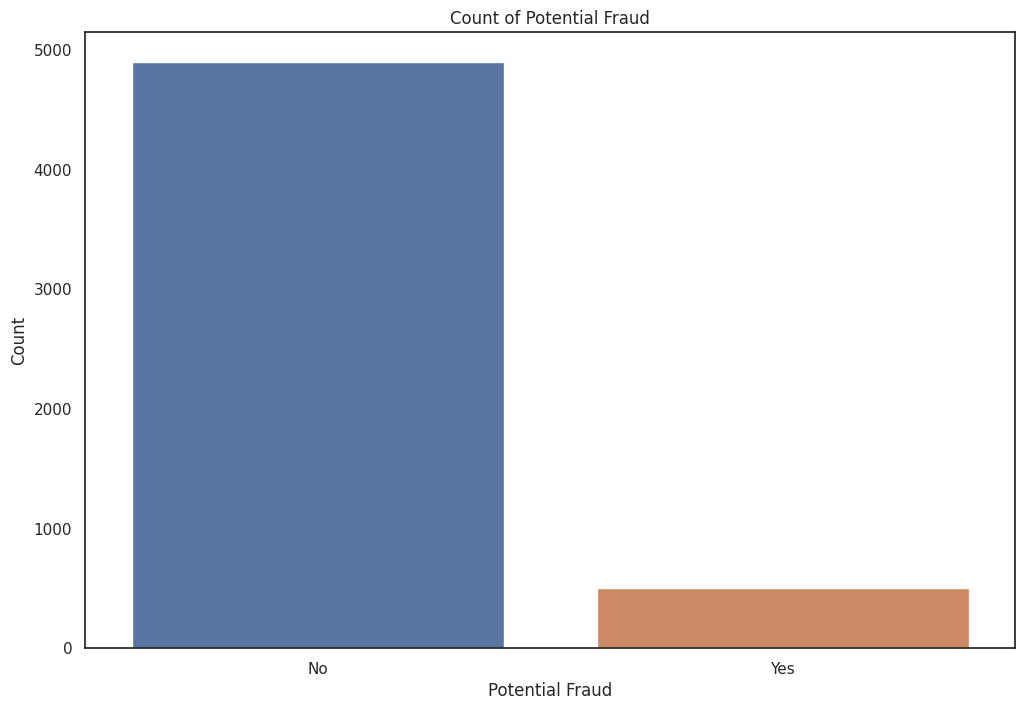

In [ ]:
sns.countplot(x='PotentialFraud', data=grouped)
plt.title('Count of Potential Fraud')
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Assuming 0 represents 'No' and 1 represents 'Yes'
plt.show()

In [ ]:
# We have class imbalance, That too very heavy so we will need to address hat as well

In [ ]:
grouped=grouped.fillna(0)

features=grouped.iloc[:,2:]
labels=grouped.iloc[:,1]

In [ ]:
features.head()

,Same_Physician,Physician_Count,Claim_Period,Admit_Period,Age,Alive,Provider_InscClaimAmtReimbursed_mean,Provider_DeductibleAmtPaid_mean,Provider_NoOfMonths_PartACov_mean,Provider_NoOfMonths_PartBCov_mean,Provider_IPAnnualReimbursementAmt_mean,Provider_IPAnnualDeductibleAmt_mean,Provider_OPAnnualReimbursementAmt_mean,Provider_OPAnnualDeductibleAmt_mean,Provider_InscClaimAmtReimbursed_std,Provider_DeductibleAmtPaid_std,Provider_NoOfMonths_PartACov_std,Provider_NoOfMonths_PartBCov_std,Provider_IPAnnualReimbursementAmt_std,Provider_IPAnnualDeductibleAmt_std,Provider_OPAnnualReimbursementAmt_std,Provider_OPAnnualDeductibleAmt_std,Bene_InscClaimAmtReimbursed_mean,Bene_DeductibleAmtPaid_mean,Bene_NoOfMonths_PartACov_mean,Bene_NoOfMonths_PartBCov_mean,Bene_IPAnnualReimbursementAmt_mean,Bene_IPAnnualDeductibleAmt_mean,Bene_OPAnnualReimbursementAmt_mean,Bene_OPAnnualDeductibleAmt_mean,Bene_InscClaimAmtReimbursed_std,Bene_DeductibleAmtPaid_std,Bene_NoOfMonths_PartACov_std,Bene_NoOfMonths_PartBCov_std,Bene_IPAnnualReimbursementAmt_std,Bene_IPAnnualDeductibleAmt_std,Bene_OPAnnualReimbursementAmt_std,Bene_OPAnnualDeductibleAmt_std,DiagCode_InscClaimAmtReimbursed_mean,DiagCode_DeductibleAmtPaid_mean,DiagCode_NoOfMonths_PartACov_mean,DiagCode_NoOfMonths_PartBCov_mean,DiagCode_IPAnnualReimbursementAmt_mean,DiagCode_IPAnnualDeductibleAmt_mean,DiagCode_OPAnnualReimbursementAmt_mean,DiagCode_OPAnnualDeductibleAmt_mean,DiagCode_InscClaimAmtReimbursed_std,DiagCode_DeductibleAmtPaid_std,DiagCode_NoOfMonths_PartACov_std,DiagCode_NoOfMonths_PartBCov_std,DiagCode_IPAnnualReimbursementAmt_std,DiagCode_IPAnnualDeductibleAmt_std,DiagCode_OPAnnualReimbursementAmt_std,DiagCode_OPAnnualDeductibleAmt_std,ProcCode_InscClaimAmtReimbursed_mean,ProcCode_DeductibleAmtPaid_mean,ProcCode_NoOfMonths_PartACov_mean,ProcCode_NoOfMonths_PartBCov_mean,ProcCode_IPAnnualReimbursementAmt_mean,ProcCode_IPAnnualDeductibleAmt_mean,ProcCode_OPAnnualReimbursementAmt_mean,ProcCode_OPAnnualDeductibleAmt_mean,ProcCode_InscClaimAmtReimbursed_std,ProcCode_DeductibleAmtPaid_std,ProcCode_NoOfMonths_PartACov_std,ProcCode_NoOfMonths_PartBCov_std,ProcCode_IPAnnualReimbursementAmt_std,ProcCode_IPAnnualDeductibleAmt_std,ProcCode_OPAnnualReimbursementAmt_std,ProcCode_OPAnnualDeductibleAmt_std
0,2.960000,1.600000,1.440000,5.000000,78.280000,1.000000,4185.600000,213.600000,12.000000,12.000000,17606.000000,897.120000,2615.200000,463.920000,10796.091144,436.009174,0.000000,0.000000,38895.477458,1332.505670,2974.176525,635.782321,3284.621746,184.477196,12.000000,12.000000,17606.000000,897.120000,2615.200000,463.920000,4972.142171,216.060632,0.0,0.0,0.0,0.0,0.0,0.0,2441.642986,168.869750,11.945072,11.965687,7579.093008,717.662027,1804.331094,543.045084,3482.066310,161.353027,0.569945,0.424192,12941.552352,1205.297144,2450.076771,661.506672,25899.436370,1062.000000,11.928571,11.928571,34245.986057,1872.442160,1813.484580,470.736736,13023.680666,56.603887,0.630570,0.545545,21794.109154,1926.160471,3558.650316,934.474357
1,2.439394,1.530303,3.674242,5.161290,69.553030,0.992424,4588.409091,502.166667,11.818182,11.871212,7568.181818,931.424242,2678.181818,737.121212,7309.794729,534.582439,1.471449,1.128434,10040.975578,1059.574926,5190.714819,1517.084151,2195.609117,215.618276,11.818182,11.871212,7568.181818,931.424242,2678.181818,737.121212,2366.603235,287.708160,0.0,0.0,0.0,0.0,0.0,0.0,3060.278581,276.574546,11.926130,11.932208,8005.353166,840.890305,2422.458599,676.313985,4017.871066,260.257069,0.726572,0.653285,12620.604411,1226.306633,3369.338617,848.213675,11170.136988,1061.957873,11.944240,11.904372,17708.016248,1814.997404,2304.585048,646.679336,7080.123699,56.208450,0.565815,0.637527,14057.241938,1361.552370,4085.677198,1058.198430
2,2.818792,1.604027,1.429530,0.000000,71.805369,0.993289,350.134228,2.080537,11.865772,11.959732,4351.879195,434.953020,2194.899329,622.751678,689.963754,11.166744,1.106844,0.491539,9889.562978,945.236867,3198.010914,873.191458,779.884195,49.993702,11.865772,11.9597

In [ ]:
labels.head()

0    0
1    1
2    0
3    1
4    0
Name: PotentialFraud, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels = oversample.fit_resample(features, labels)

In [ ]:
features.shape

(9808, 70)

In [ ]:
labels.shape

(9808,)

In [ ]:
# Using Z-Score Normalization for features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
featuresstand=scaler.fit_transform(features)

In [ ]:
# Using class weights to handle the class imbalance better

from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

ff=compute_class_weight(class_weight="balanced",classes=np.unique(labels),y=labels)
cw=dict(zip(np.unique(labels),ff))

featuress,labelss=shuffle(featuresstand,labels)
xtrain,xtest,ytrain,ytest = train_test_split(featuress,labelss,test_size=0.2)

# Modelling

In [ ]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import f1_score
from lazypredict.Supervised import LazyClassifier

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [ ]:
# LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(xtrain, xtest, ytrain, ytest)

# Calculate F1 scores
f1_scores = {}
for model_name, preds in predictions.items():
    f1_scores[model_name] = f1_score(ytest, preds, average='weighted')

# Print F1 scores
for model_name, f1_score in f1_scores.items():
    print(f'{model_name}: {f1_score}')

 97%|█████████▋| 28/29 [00:38<00:00,  1.06it/s]

[LightGBM] [Info] Number of positive: 3905, number of negative: 3941
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16319
[LightGBM] [Info] Number of data points in the train set: 7846, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497706 -> initscore=-0.009177
[LightGBM] [Info] Start training from score -0.009177


100%|██████████| 29/29 [00:39<00:00,  1.37s/it]

AdaBoostClassifier: 0.9107699310531812
BaggingClassifier: 0.9413766351183006
BernoulliNB: 0.8051652647112342
CalibratedClassifierCV: 0.8296507644400801
DecisionTreeClassifier: 0.9061549121466309
DummyClassifier: 0.3231898376852505
ExtraTreeClassifier: 0.9107264616843738
ExtraTreesClassifier: 0.9663381750091177
GaussianNB: 0.8258843111546231
KNeighborsClassifier: 0.8631904758298267
LabelPropagation: 0.9089288457116752
LabelSpreading: 0.9089288457116752
LinearDiscriminantAnalysis: 0.8211840208168456
LinearSVC: 0.8325863313232285
LogisticRegression: 0.8301655202417024
NearestCentroid: 0.7951979053619466
NuSVC: 0.8280951180429424
PassiveAggressiveClassifier: 0.7554045043891594
Perceptron: 0.7854405985611045
QuadraticDiscriminantAnalysis: 0.7992370837707021
RandomForestClassifier: 0.9541168488340463
RidgeClassifier: 0.8201592874117846
RidgeClassifierCV: 0.8196333730714076
SGDClassifier: 0.81244506203056
SVC: 0.8863344133897775
XGBClassifier: 0.9561376219815774
LGBMClassifier: 0.950516953047

In [ ]:
# XG Boost and Random Forest seem very promising, So let's do hyperparameter tuning on those

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

"""
# XGBoost Classifier with hyperparameter tuning
xgb_params = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5, scoring='f1_weighted')
xgb_grid.fit(xtrain, ytrain)

best_xgb_model = xgb_grid.best_estimator_"""

"\n# XGBoost Classifier with hyperparameter tuning\nxgb_params = {\n    'learning_rate': [0.1, 0.01],\n    'n_estimators': [100, 200, 300],\n    'max_depth': [3, 5, 7]\n}\n\nxgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5, scoring='f1_weighted')\nxgb_grid.fit(xtrain, ytrain)\n\nbest_xgb_model = xgb_grid.best_estimator_"

In [ ]:
"""rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(class_weight=cw), rf_params, cv=5, scoring='f1_weighted')
rf_grid.fit(xtrain, ytrain)

best_rf_model = rf_grid.best_estimator_"""

"rf_params = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 5, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\nrf_grid = GridSearchCV(RandomForestClassifier(class_weight=cw), rf_params, cv=5, scoring='f1_weighted')\nrf_grid.fit(xtrain, ytrain)\n\nbest_rf_model = rf_grid.best_estimator_"

In [ ]:
# The hyperparameter tuning has already been done, So let's use the best hyperparameters

best_rf_model = RandomForestClassifier(class_weight=cw, n_estimators=300)
best_rf_model.fit(xtrain, ytrain)

best_xgb_model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=300)
best_xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import f1_score

# Evaluate models on the test set
y_pred_xgb_test = best_xgb_model.predict(xtest)
y_pred_rf_test = best_rf_model.predict(xtest)

f1_xgb_test = f1_score(ytest, y_pred_xgb_test, average='weighted')
f1_rf_test = f1_score(ytest, y_pred_rf_test, average='weighted')

print("XGBoost F1 score on test set:", f1_xgb_test)
print("Random Forest F1 score on test set:", f1_rf_test)

XGBoost F1 score on test set: 0.9607267570337201
Random Forest F1 score on test set: 0.9541112646713718


**XGBoost BestModel**

In [ ]:
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**RandomForest Best Model**

In [ ]:
best_rf_model

RandomForestClassifier(class_weight={0: 1.0, 1: 1.0}, n_estimators=300)

In [ ]:

# Classification report for XGBoost
print("Classification Report for XGBoost:")
print(classification_report(ytest, y_pred_xgb_test))

# Classification report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(ytest, y_pred_rf_test))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       963
           1       0.94      0.98      0.96       999

    accuracy                           0.96      1962
   macro avg       0.96      0.96      0.96      1962
weighted avg       0.96      0.96      0.96      1962


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       963
           1       0.94      0.97      0.96       999

    accuracy                           0.95      1962
   macro avg       0.95      0.95      0.95      1962
weighted avg       0.95      0.95      0.95      1962



**Risk Analysis of this classification report (For XGBoost)**

 In this case, the precision for class 0 (non-fraudulent) is 0.98, and for class 1 (fraudulent) is 0.94. This indicates that when the model predicts a transaction as non-fraudulent, it is correct 98% of the time, and when it predicts a transaction as fraudulent, it is correct 94% of the time.

 Meanwhile the recall for class 0 is 0.94, and for class 1 is 0.98. This implies that the model is able to correctly identify 94% of non-fraudulent transactions and 98% of fraudulent transactions.

**Using Fully Connected Neural Network**

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtrain, ytrain, epochs=500, batch_size=128, verbose=0,
          validation_data=(xtest,ytest), class_weight=cw)

# Evaluate the model on test data
print("Classification Report for Model:")
y_pred_proba = model.predict(xtest)
y_pred = (y_pred_proba > 0.5).astype(int)
print(classification_report(ytest, y_pred))

2024-03-13 07:17:19.401436: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 07:17:19.401541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 07:17:19.533575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1710314253.001547     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Classification Report for Model:
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       963
           1       0.93      0.98      0.95       999

    accuracy                           0.95      1962
   macro avg       0.95      0.95      0.95      1962
weighted avg       0.95      0.95      0.95      1962



In [ ]:
# FFNN is not performing any better than RandomForest or XGBoost
# Let's save XGBoost for inferencing on Test Dataset

****Another reason for using XGBoost is that it has been seen in many experiments that if the tabular dataset is not too big(more than 10M rows) or so, Neural Networks can overfit easily while tree based algorithms work and generalise better.****

In [ ]:
import joblib
joblib.dump(best_xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
# Now we will use it to infer in the Inference Notebook